In [13]:
import numpy as np

ta = 0.1   # bias of coina
tb = 0.8   # BIAS of coinb
d = 10
n= 30   #total samples
z = np.zeros(n) #hidden A =0 B=1
x = np.zeros(n) #number of heads

for i in range(n):
    if np.random.uniform() <0.5:
        x[i]  = np.random.binomial(d,ta)
    else:
        x[i]  = np.random.binomial(d,tb)
        z[i]=1
        
## forget zs
currAEst = 0.51 #beta or uniform choices are ok  
currBEst = 0.534

repeatcount = 1000  # instead of checking for convergence
gammaiA = np.zeros(n)
gammaiB = np.zeros(n)
for i in range(repeatcount):
    ## EStep starts
    for j in range(n):
        gammaiA[j] = 0.5* np.power(currAEst,x[j]) *np.power(1-currAEst,d-x[j]) 
        gammaiA[j] /= (0.5*np.power(currAEst,x[j]) *np.power(1-currAEst,d-x[j]) + 0.5* np.power(currBEst,x[j]) *np.power(1-currBEst,d-x[j]) )
        gammaiB[j] = 1 - gammaiA[j]
    numA = denA = numB = denB = 0
    #Estep ends
    
    #MStep starts
    for k in range(n):       
        numA += gammaiA[k]*x[k]
        numB += gammaiB[k]*x[k]
        denA += gammaiA[k]*d
        denB += gammaiB[k]*d
    currAEst = numA/denA
    currBEst = numB/denB
    #Msteps ends

print(currAEst,currBEst)

0.08429600001903774 0.7645981593789123


In [14]:
y_pred=np.zeros(n)
for i in range(0,n):
    if gammaiA[i]>=gammaiB[i]:
        y_pred[i]=0
    else:
        y_pred[i]=1

In [15]:
cntOfWrongPred=np.float128(0.0)
for i in range(0,n):
  y=y_pred[i]
  if y!=z[i]:
    cntOfWrongPred+=1.0

Perr=cntOfWrongPred/n
Perr

0.033333333333333333335

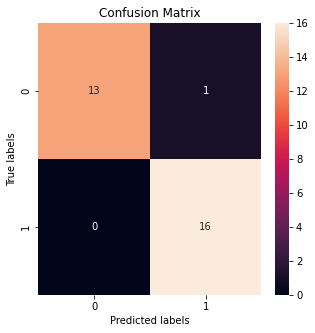

In [16]:
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

confusionMat=sklearn.metrics.confusion_matrix(z,y_pred)
confusionMat
ax= plt.subplots(figsize=(5,5))

ax=sns.heatmap(confusionMat, annot=True, fmt='g');  #annot=True to annotate cells, ftm='g' to disable scientific notation

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 